In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fnames = ['test_own_killer', 'test_boosting_hunter', 'test_boosting_hunter_reduced', 'test_tournament']
fname  = fnames[3] 
with open('data/' + fname + '.json', 'r') as file:
    data = json.load(file)

In [3]:
names  = []

steps    = []
invalid  = []
suicides = []

score   = []
coins   = []
kills   = []
rounds  = []

for agent in data['by_agent']:
    try:
        steps.append(data['by_agent'][agent]['steps'])
    except:
        steps.append(0)
    try:
        invalid.append(data['by_agent'][agent]['invalid'])
    except:
        invalid.append(0)
    try: 
        suicides.append(data['by_agent'][agent]['suicides'])
    except:
        suicides.append(0)
    try:
        score.append(data['by_agent'][agent]['score'])
    except:
        score.append(0)
    try:
        coins.append(data['by_agent'][agent]['coins'])
    except:
        coins.append(0)
    try:
        kills.append(data['by_agent'][agent]['kills'])
    except:
        kills.append(0)
    try:
        rounds.append(data['by_agent'][agent]['rounds'])
    except:
        rounds.append(0)
    strings = ['_', '0', '1', '2', '3']
    replace = [' ', '', '', '', '']
    for s, r in zip(strings, replace):
        agent = agent.replace(s, r)
    names.append(agent)
        
steps    = np.array(steps)
invalid  = np.array(invalid)
suicides = np.array(suicides)
score    = np.array(score)
coins    = np.array(coins)
kills    = np.array(kills)
rounds   = np.array(rounds)

In [4]:
df = pd.DataFrame(data=[steps, invalid, suicides, score, coins, kills, rounds], columns=names, index=['steps', 'invalid', 'suicides', 'score', 'coins', 'kills', 'rounds'])
display(df)

,boosting hunter,boosting hunter reduced,own cleaner,rule based agent
steps,15150,16279,24994,25712
invalid,2612,3175,637,715
suicides,60,57,27,37
score,290,316,500,344
coins,205,226,295,174
kills,17,18,41,34
rounds,100,100,100,100


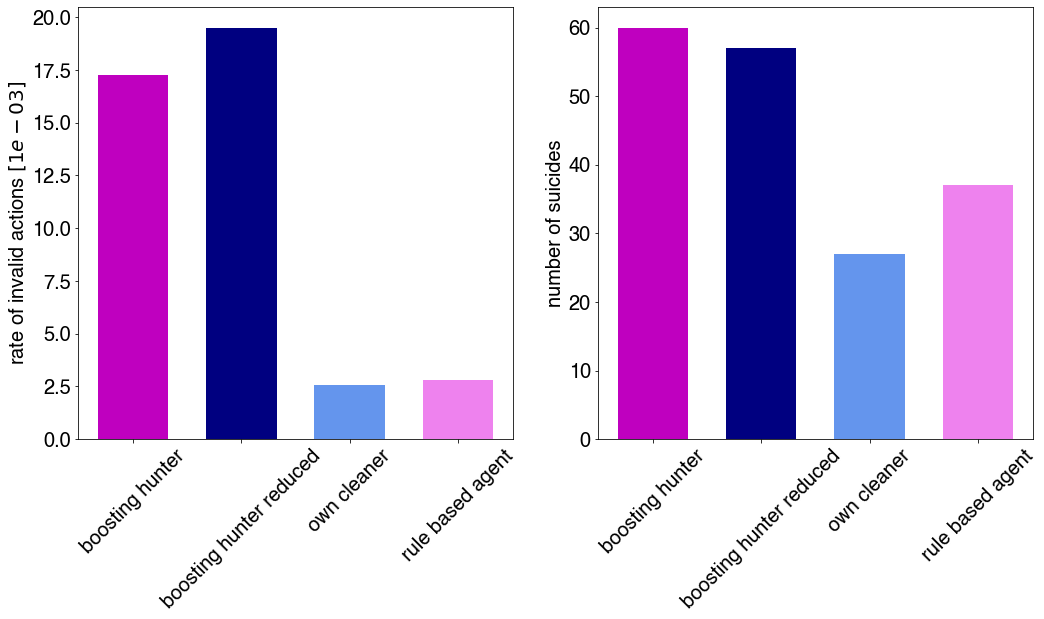

In [5]:
# trainings plot
plt.rc('font', size=20) 
plt.rc('font', family='Helvetica')
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 9))

x = np.arange(len(names))

ax1.bar(x, invalid/steps*100, width=0.65, color=['m', 'navy', 'cornflowerblue', 'violet'])
ax2.bar(x, suicides, width=0.65, color=['m', 'navy', 'cornflowerblue', 'violet'])

ax1.set_ylabel(f'rate of invalid actions $[1e-03]$')
ax2.set_ylabel('number of suicides')

ax1.set_xticks(x, names, rotation=45)
ax2.set_xticks(x, names, rotation=45)

plt.tight_layout()

plt.savefig('images/training_' + fname + '.png', dpi=500)
plt.show()

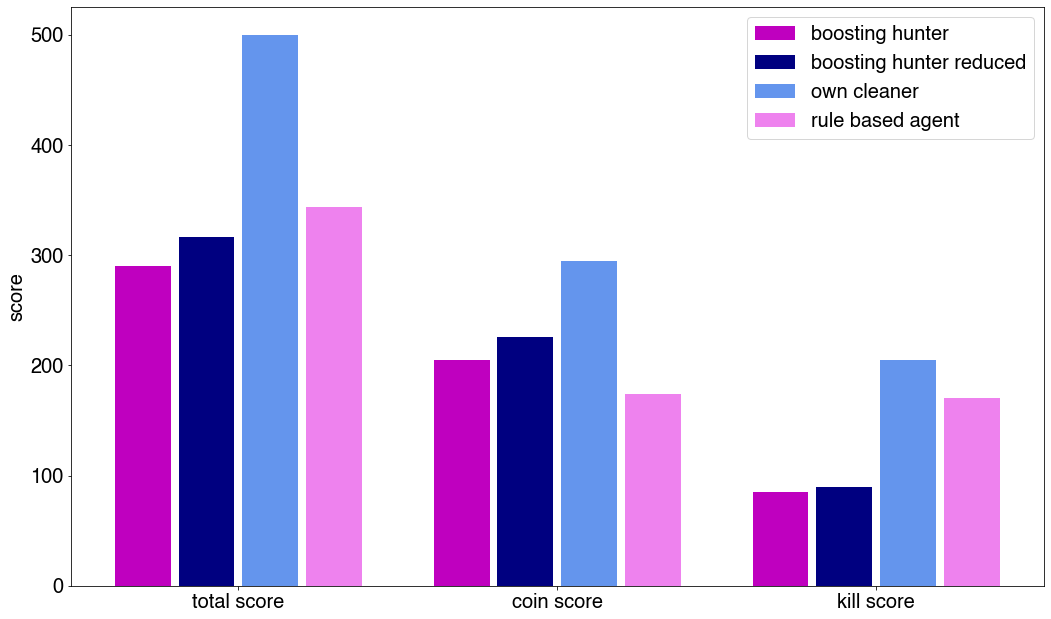

In [6]:
# data formatiing
agents = np.array([score, coins, kills*5]).T
categories = ['total score', 'coin score', 'kill score']

# plotting performance
plt.rc('font', size=20)
plt.rc('font', family='Helvetica')
plt.figure(figsize=(15, 9))

x = np.arange(len(categories))
plt.bar(x-0.3, agents[0], width=0.175, color='m', label=names[0])
plt.bar(x-0.1, agents[1], width=0.175, color='navy', label=names[1])
plt.bar(x+0.1, agents[2], width=0.175, color='cornflowerblue', label=names[2])
plt.bar(x+0.3, agents[3], width=0.175, color='violet', label=names[3])

plt.xticks(x, categories)
plt.ylabel('score')
plt.legend()

plt.tight_layout()
plt.savefig('images/performance_' + fname + '.png', dpi=500)
plt.show()